# Programming Assigment 1
### Intro into RDKit and similarity search

## 1. load dataset in a Jupyter notebook and extract relevant column to be processed

In [1]:
import pandas as pd

df = pd.read_csv("compounds.csv", sep=";")
df.head()

,name,smiles,pubmed
0,"Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate",CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/1179...
1,"(S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...",COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl,https://pubchem.ncbi.nlm.nih.gov/compound/1013...
2,Etilevodopa,CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/170345
3,Foslevodopa,C1=CC(=C(C=C1CC(C(=O)O)N)O)OP(=O)(O)O,https://pubchem.ncbi.nlm.nih.gov/compound/127766
4,Melevodopa,COC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/23497


In [2]:
smiles_column = df["smiles"]
smiles_column

0           CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N
1         COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl
2           CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N
3    C1=CC(=C(C=C1CC(C(=O)O)N)O)OP(=O)(O)O
4            COC(=O)C(CC1=CC(=C(C=C1)O)O)N
5        C1=CC(=C(C=C1CC(C(=O)O)N)O)O.[Na]
6            COC1=C(C=C(C=C1)CC(C(=O)O)N)O
7            COC1=C(C=CC(=C1)CC(C(=O)O)N)O
Name: smiles, dtype: object

## 2. compute molecular fingerprints for each compound

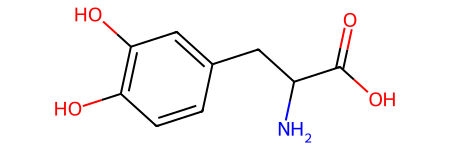

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

fgen = AllChem.GetMorganGenerator(radius=2)

# reference compound - levodopa
levodopa_smiles = "C1=CC(=C(C=C1CC(C(=O)O)N)O)O"
levodopa_mol = Chem.MolFromSmiles(levodopa_smiles)
levodopa_fingerprint = fgen.GetFingerprint(levodopa_mol)

# compounds
df["mols"] = [Chem.MolFromSmiles(smiles) for smiles in smiles_column]
df["morgan"] = [fgen.GetFingerprint(mol) for mol in df["mols"]]

levodopa_mol

## 3. compute Tanimoto similarity measure for each pair of compound x reference compound 

In [4]:
from rdkit import DataStructs

df["tanimoto_morgan"] = [DataStructs.TanimotoSimilarity(levodopa_fingerprint, fingerprint) for fingerprint in df["morgan"]]
df[["name", "tanimoto_morgan"]]

,name,tanimoto_morgan
0,"Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate",0.638889
1,"(S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...",0.638889
2,Etilevodopa,0.638889
3,Foslevodopa,0.615385
4,Melevodopa,0.657143
5,L-DOPA (sodium),0.964286
6,"Tyrosine, 3-hydroxy-O-methyl-",0.666667
7,3-Methoxytyrosine,0.666667


## 4. provide sorting, report top 3 hits and discuss your results (with reference to the first lecture and limitations) 

In [5]:
df = df.sort_values(by=["tanimoto_morgan"], ascending=False)
df[["name", "tanimoto_morgan"]].head(3)

,name,tanimoto_morgan
5,L-DOPA (sodium),0.964286
6,"Tyrosine, 3-hydroxy-O-methyl-",0.666667
7,3-Methoxytyrosine,0.666667


## Discussion
- L-DOPA (sodium) (sodium) ma similarity 0.96, vsechny ostatni slouceniny maji similarity mezi 0.6 a 0.7.
- L-DOPA (sodium) je tedy podle Tanimoto metriky zdaleka nejlepsi.
- Nicmene na vysledek ma velky vliv vybrana metrika.
- Vysledky se velmi lisi i v pripade pouziti RDKit (topological) fingerprints misto Morgan fingerprints

## BONUS: implement N similarity measures (such as Tanimoto, Dice, Euclidean) x M (fingerprints) and compare them in a graphical form 

### Fingerprints
- RDKit (topological)
- Atom pairs
- Morgan (already calculated

In [6]:
# RDKit (topological)
fgen =  AllChem.GetRDKitFPGenerator()
levodopa_fingerprint = fgen.GetFingerprint(levodopa_mol)
df["topological"] = [fgen.GetFingerprint(mol) for mol in df["mols"]]
df["topological"]

# Atom pairs
fgen = AllChem.GetAtomPairGenerator()
levodopa_fingerprint = fgen.GetFingerprint(levodopa_mol)
df["atom_pairs"] = [fgen.GetFingerprint(mol) for mol in df["mols"]]
df["atom_pairs"]

5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
0    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: atom_pairs, dtype: object

### Similarity measures
- Tanimoto
- Dice
- Cosine
- Sokal
- Russel

In [7]:
for fingerprints in ["morgan", "topological", "atom_pairs"]:
    df[f"tanimoto_{fingerprints}"] = [DataStructs.TanimotoSimilarity(levodopa_fingerprint, fingerprint) for fingerprint in df[fingerprints]]
    df[f"dice_{fingerprints}"] = [DataStructs.DiceSimilarity(levodopa_fingerprint, fingerprint) for fingerprint in df[fingerprints]]
    df[f"cosine_{fingerprints}"] = [DataStructs.CosineSimilarity(levodopa_fingerprint, fingerprint) for fingerprint in df[fingerprints]]
    df[f"sokal_{fingerprints}"] = [DataStructs.SokalSimilarity(levodopa_fingerprint, fingerprint) for fingerprint in df[fingerprints]]
    df[f"russel_{fingerprints}"] = [DataStructs.RusselSimilarity(levodopa_fingerprint, fingerprint) for fingerprint in df[fingerprints]]

### Vizualization
- Heatmap
- Similarity map

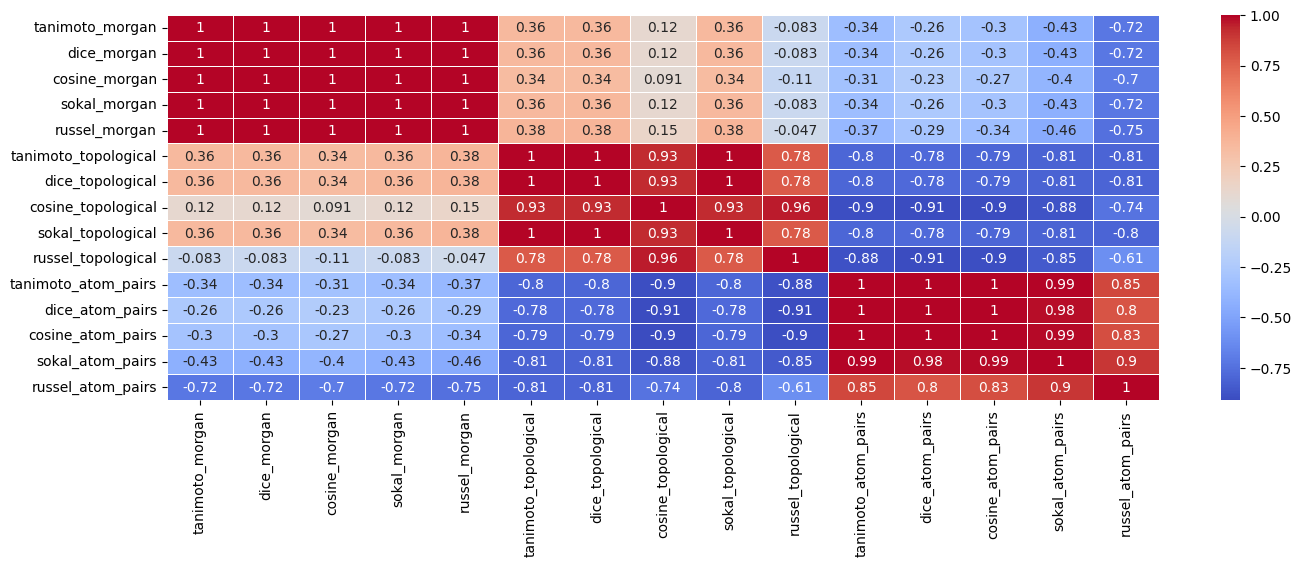

In [8]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

columns = [col for col in df.columns if any(metric in col for metric in ["tanimoto", "dice", "cosine", "sokal", "russel"])]
result_df = df[columns]

plt.figure(figsize = (16,5))
ax = sns.heatmap(result_df.corr(), annot=True, cmap="coolwarm", linewidths=.5)

### Discussion heatmap
- Z heatmapy je videt, ze je vyznamna korelace mezi jednotlivymi vysledky se stejnym pouzitym fingerprintem.
- Ale velmi se lisi mezi jednotlivymi fingerprinty.
- Vypada to, ze pouzity fingerprint ma jeste vetsi vliv na vysledek, nez pouzita metrika, je tudiz potreba zvolit spravny fingerprint podle toho, ktery je pro danou ulohu nejvhodnejsi.